стр.378

Задачи данной главы - познакомить читателя:
* с базовой терминологией и понятиями машинного обучения
* с API библиотеки Scikit-Learn и некоторыми примерами его использования
* с подробностями нескольких наиболее важных методов машинного обучения, помочь разобраться в том, как они работают, а так же где и когда применимы.

# Что такое машинное обучение

В контексте приложения методов машинного обучения к науке о данных машинное обучение нужно рассматривать как средство *создания моделей данных*

Машинное обучение занимается построением математических моделей для исследования данных. Задачи "обучения" начинаются с появлением у этих моделей *настраиваемых параметров*, которые можно приспособить для отражения наблюдаемых данных, таким образом, программа как бы обучается на данных. Как только эти модели обучатся на имеющихся данных наблюдений, их можно будет использовать для предсказания и понимания различных аспектов данных новых наблюдений.

Для эффективного использования этих инструментов необходимо понимать общую формулировку задачи машинного обучения, поэтому начнем с широкой классификации типов подходов, которые мы будем обсуждать.

## Категории машинного обучения

На базовом уровне машинное обучение можно разделить на два основных типа:
1. **Машинное обучение с учителем** (supervised learning) - включает моделирование признаков данных и соответствующих данным меток. После выбора модели ее можно использовать для присвоения меток новым, неизвестным ранее данным. Оно разделяется далее на **задачи классификации** и **задачи регрессии**. При классификации метки представляют собой дискретные категории, а при регрессии они являются непрерывными величинами. Мы рассмотрим примеры обоих типов машинного обучения с учителем в следующем разделе.
2. **Машинное обучение без учителя** (unsurvived learning) - включает моделирование признаков набора данных без каких-либо меток и описывается фразой "Пусть набор данных говорит сам за себя". Эти модели включают такие задачи как **кластеризация** (clustering) и **понижение размерности** (dimensionality reduction). Алгоритмы кластеризации служат для выделения отдельных групп данных, в то время как алгоритмы понижения размерности предназначены для поиска более сжатых представлений данных. Мы рассмотри примеры обоих типов машинного обучения без учителя в следующем разделе.

Кроме того, существуют так называемые методы частичного обучения (semi-supervised learning), располагающиеся примерно по середине между машинным обучением с учителем и машинным обучением без учителя. Методы частичного обучения бывают полезны в случае наличия лишь неполных меток.

# Знакомство с библиотекой Scikit-Learn

Существует несколько библиотек языка Python с надежными реализациями широкого диапазона алгоритмов машинного обучения. Одна из самых известных - Scikit-Learn, пакет, предоставляющий эффективные версии множества распространенных алгоритмов. Пакет Scikit-Learn отличает аккуратный, единообразный и продвинутый API, а также удобная и всеохватывающая онлайн-документация. Преимущество этого единообразия в том, что разобравшись в основах использования и синтаксисе Scikit-Learn для одного типа моделей, вы сможете легко перейти к другой модели или алгоритму.

## Представление данных в Scikit-Learn

Машинное обучение связано с созданием моделей на основе данных, поэтому начнем с обсуждения понятного компьютеру представления данных. Лучше всего представлять используемые в библиотеке Scikit-Learn данные в виде таблиц.

### Данные как таблица

Простейшая таблица - двумерная сетка данных в которой строки представляют отдельные элементы набора данных, а столбцы - атрибуты, связанные с каждым из этих элементов. Например рассмотрим набор данных Iris (https://en.wikipedia.org/wiki/Iris_flower_data_set), проанализированный Рональдом Фишером в 1936 году. Скачаем его в виде объекта DataFrame библиотеки Pandas с помощью бибилиотеки Seaborn:

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Каждая строка данных относится к одному из измеренных цветков, а количество строк равно полному количеству цветков в наборе данных. Мы будем называть строки этой матрицы **выборками** (samples), а количество строк полагать равным **n_samples**.

Каждый столбец данных относится к конкретному количественному показателю, описывающему данную выборку. Мы будем называть столбцы матрицы **признаками** (features), а количество столбцов полагать равным **n_features**

### Матрица признаков

Из устройства таблицы очевидно, что информацию можно рассматривать как двумерный числовой массив или матрицу, которую мы будем называть **матрица признаков** (feature matrix). По традиции матрицу часто хранят в переменной X. Предполагается, что матрица признаков - двумерная, с формой [n_samples, n_features], и хранят ее чаще всего в массиве NumPy или объекте DataFrame библиотеки Pandas, хотя некоторые модели библиотеки Scikit-Learn допускают использование также разреженных матриц из библиотеки SciPy.

Выборки (т.е. строки) всегда соответствуют отдельным объектам, описываемым набором данных. Например, выборка может быть цветком, человеком, документом, изображением, звуковым файлом, видеофайлом, астрономическим объектом или чем-то еще, что можно описать с помощью набора количественных измерений.

Признаки (т.е. столбцы) всегда соответствуют конкретным наблюдениям, описывающим каждую из выборок количественным образом.
Значения признаков обычно представляют собой вещественные числа, но в некоторых случаях они могут быть булевыми или иметь дискретные (перечислимые) значения.

### Целевой массив

Помимо матрицы признаков x, обычно мы имеем дело с **целевым массивом** (массивом меток), который принято обозначать y. Целевой массив обычно одномерен, длиной **n_samples**. Его хранят в массиве NumPy или объекте Series. Значения целевого массива могут быть непрерывными числовыми или дискретными классами/метками. Хотя некоторые оцениватели библиотеки Scikit-Learn умеют работать с несколькими целевыми величинами в виде двумерного целевого массива [n_samples, n_targets], мы в основном будем работать с более простым случаем одномерного массива.

Отличительная черта целевого массива от остальных столбцов признаков в том, что он представляет собой величину, значение которой мы хотим *предсказать на основе имеющихся данных* говоря статистическим языком, это зависимая переменная (dependent variable). Например, для предыдущих данных это могла оказаться модель для предсказания вида цветка на основе остальных измерений. В таком случае столбец species рассматривался бы как целевой массив.

С учетом вышесказанного можно воспользоваться библиотекой Seaborn (которую мы рассматривали в разделе "Визуализация с помощью библиотеки Seaborn"), чтобы без труда визуализировать данные:

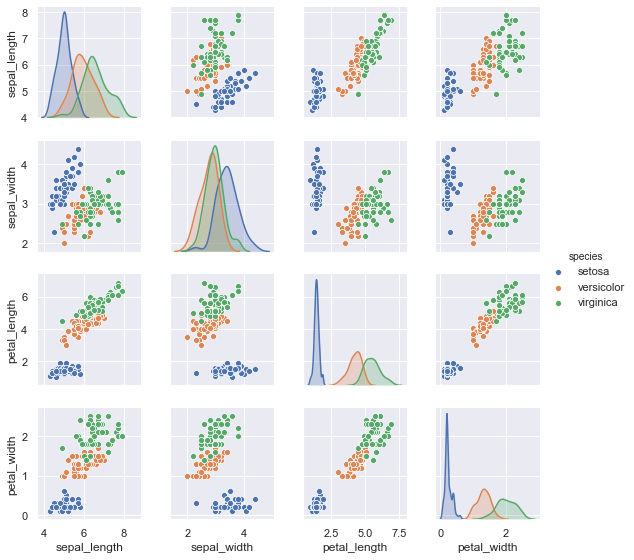

In [4]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=2);

Для использования набора данных Iris в Scikit-Learn мы извлечем матрицу признаков и целевой массив из объекта DataFrame:

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [9]:
y_iris = iris['species']
y_iris.shape

(150,)

Теперь, отформатировав наши данные нужным образом, мы можем перейти к рассмотрению API *статистических оценок* библиотеки Scikit-Learn.

# API статистического оценивания библиотеки Scikit-Learn

В документации по API Scikit-Learn говорится, что он основывается на следующих принципах:
* *единообразие* - интерфейс всех объектов идентичен и основан на ограниченном наборе методов, причем документация тоже единообразна;
* *контроль* - видимость всех задаваемых значений параметров как открытых атрибутов;
* *ограниченная иерархия объектов* - классы языка Python используются только для алгоритмов; наборы данных представлены в стандартных форматах (массивы NumPy, объекты DataFrame, разреженные матрицы SciPy), а для имен параметров используются стандартные строки языка Python;
* *объединение* - многие из задач машинного обучения можно выразить в виде последовательностей алгоритмов более низкого уровня, и библиотека Scikit-Learn пользуется этим фактом при любой возможности;
* *разумные значения по умолчанию* - библиотека задает для необходимых моделей пользовательских параметров соответствующие значения по умолчанию.

На практике эти принципы очень облегчают изучение библиотеки Scikit-Learn. Все алгоритмы машинного обучения в библиотеке Scikit-Learn реализуются через API статистического оценивания, предоставляющий единообразный интерфейс для широкого диапазона прикладных задач машинного обучения.

## Основы API статистического оценивания

Чаще всего использование API статистического оценивания библиотеки Scikit-Learn включает следующие шаги:
1. Выбор класса модели с помощью импорта соответствующего класса оценивателя из библиотеки Scikit-Learn.
2. Выбор гиперпараметров модели путем создания экземпляра этого класса с соответстветствующими значениями
3. Компоновка данных в матрицу признаков и целевой вектор в соответствии с описанием выше.
4. Обучение модели на своих данных посредством вызова метода fit() экземпляра модели.
5. Применение модели к новым данным:
 * в случае машинного обучения с учителем метки для неизвестных данных обычно предсказывают с помощью метода predict();
 * в случае машинного обучения без учителя выполняется преобразование свойств данных или вывод их значений посредством метода transform() или predict().

Рассмотрим несколько простых примеров применения методов обучения без учителя и с учителем.

## Пример обучения с учителем: простая линейная регрессия

В качестве примера этого процесса возьмем простую линейную, т.е. часто встречающийся случай подбора разделяющей прямой для данных вида *(x,y)*. Для этого примера возьмем следующие простые данные:

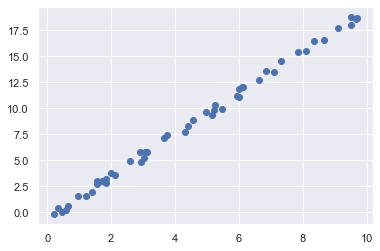

In [12]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)

#plt.scatter(x, y);

fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y)

Затем мы можем воспользоваться описанным выше рецептом. Пройдемся по всем шагам этого процесса.

### 1. Выбор класса модели.

Каждый класс модели в библиотеке Scikit-Learn представлен соответствующим классом языка Python. Так например для расчета модели простой линейной регрессии можно импортировать класс линейной регрессии:

In [13]:
from sklearn.linear_model import LinearRegression

Обратите внимание, что существуют и другие, более общие модели линейной регрессии, прочитать о них подробнее вы можете в документации модуля sklearn.linear_model (http://scikit-learn.org/stable/modules/linear_model.html).

### 2. Выбор гиперпараметров модели

Подчеркнем важный момент: *класс модели - не то же самое, что экземпляр модели.*
После выбора класса модели у нас все еще остаются некоторые возможности для выбора. В зависимости от нашего класса модели может понадобиться ответить на один или несколько следующих вопросов.
* Хотим ли мы выполнить подбор сдвига прямой (т.е. точки пересечения с осью координат)?
* Хотим ли мы нормализовать модель?
* Хотим ли мы сделать модель более гибкой, выполнив предварительную обработку признаков?
* Какая степень регуляризации должна быть у нашей модели?
* Сколько компонент модели мы хотели бы использовать?

Это примеры тех важных решений, которые нам придется принять *после выбора класса модели*. Результаты этих решений часто называют **гиперпараметрами**, т.е. параметрами задаваемыми до обучения модели на данных. Выбор гиперпараметров в библиотеке Scikit-Learn осуществляется путем передачи значений при создании экземпляра модели. Мы рассмотрим количественные обоснования выбора гиперпараметров в разделе "Гиперпараметры и проверка модели".

Создадим экземпляр класса **LinearRegression** и укажем с помощью гиперпараметра **fit_intercept**, что нам бы хотелось выполнить подбор точки пересечения с осью координат:

In [22]:
model = LinearRegression(fit_intercept=True, n_jobs=1)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

При создании экземпляра модели выполняется только сохранение значений этих гиперпараметров. В частности, мы все еще не применили модель ни к каким данным: API библиотеки Scikit-Learn очень четко разделяет **выбор модели** и **применение модели к данным**

### 3. Формирование из данных матриц признаков и целевого вектора.

Ранее мы подробно рассмотрели представление данных в библиотеке Scikit-Learn, для которого необходима двумерная матрица признаков и одномерный целевой вектор. Наша целевая переменная *y* уже имеет нужный вид (массив длиной n_samples), но нам придется проделать небольшие манипуляции с данными *x*, чтобы сделать из них матрицу размера [n_samples, n_features]. В данном случае манипуляции сводятся просто к изменению формы одномерного массива: 

In [23]:
X = x[:, np.newaxis]
X.shape

(50, 1)

### 4. Обучение модели наших данных.

Пришло время применить модель к данным. Сделать это можно с помощью метода **fit()** модели: 

In [24]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Команда **fit()** вызывает выполнение "под капотом" множества вычислений, в зависимости от модели, и сохранение результатов этих вычислений в атрибутах модели, доступных для просмотра пользователем. В библиотеке Scikit-Learn по традиции все параметры модели, полученные в процессе выполнения команды fit(), содержат в конце названия знак подчеркивания. Например в данной линейной модели: 

In [25]:
model.coef_

array([2.00660766])

In [26]:
model.intercept_

-0.5350275750800026

Эти два параметра представляют собой угловой коэффициет и точку пересечения с осью координат для простой линейной аппроксимации наших данных. Сравнивая с описанием данных, видим, что они очень близки к исходному угловому коэффициенту, раыному 2, и точке пересечения, равной -1.

Часто возникает вопрос относительно погрешностей в подобных внутренних параметрах модели. В целом библиотека Scikit-Learn не предоставляет инструментов, позволяющих делать выводы непосредственно из внутренних параметров модели: интерпретация параметров скорее вопрос **статистического моделирования**, а не машинного обучения. Машинное обучение концентрируется на том, что *предсказывает* модель. Чтобы узнать больше о смысле подбираемых параметров модели, существуют другие инструменты, включая пакет StatsModels языка Python (http://statsmodels.sourceforge.net/).

### 5. Предсказание меток для новых данных

После обучения модели главная задача машинного обучения с учителем заключается в вычислении с ее помощью значений для новых данных, не являющихся частью обучающей последовательности. Сделать это в библиотеке Scikit-Learn можно посредством метода predict()

стр 397